# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN on augmented images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [ ]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# !pip install tensorflow==1.15.0
# !pip install keras==1.2.2

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


### 2. Visualize the First 24 Training Images

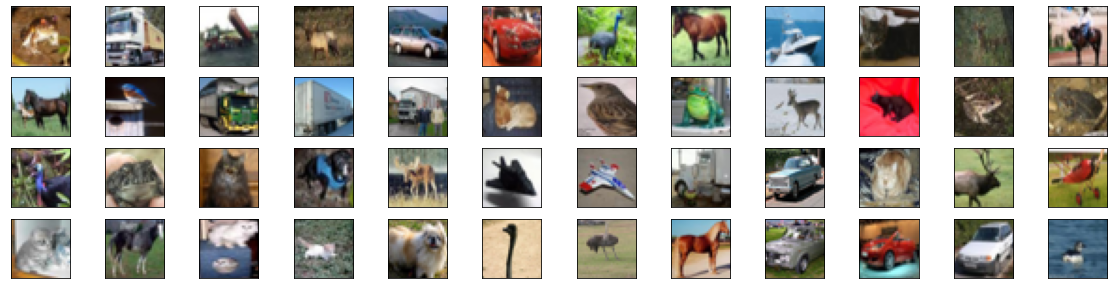

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(48):
    ax = fig.add_subplot(4, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [ ]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255 

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [ ]:
from keras.utils import np_utils
import tensorflow as tf

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes)

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Create and Configure Augmented Image Generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
#datagen_train.fit(x_train)

### 6. Visualize Original and Augmented Images

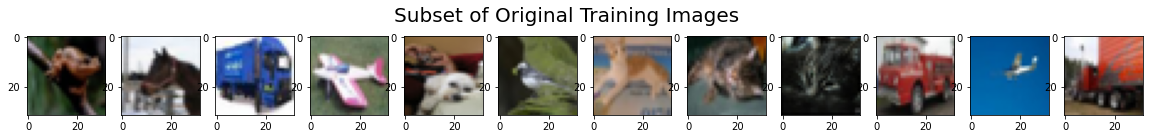

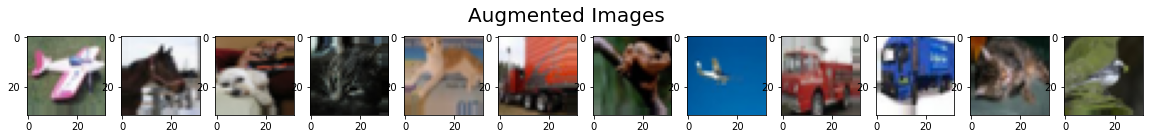

In [ ]:
import matplotlib.pyplot as plt

# take subset of training data
x_train_subset = x_train[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

### 7. Define the Model Architecture 

In [ ]:
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(nb_filter=16,nb_row=2, nb_col = 2 , border_mode='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(nb_filter=32,nb_row=2, nb_col = 2, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(nb_filter=64,nb_row=2, nb_col = 2, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(nb_filter=128,nb_row=2, nb_col = 2, border_mode='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(25, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_10 (Convolution2D) (None, 32, 32, 16)    208         convolution2d_input_4[0][0]      
____________________________________________________________________________________________________
maxpooling2d_10 (MaxPooling2D)   (None, 16, 16, 16)    0           convolution2d_10[0][0]           
____________________________________________________________________________________________________
convolution2d_11 (Convolution2D) (None, 16, 16, 32)    2080        maxpooling2d_10[0][0]            
____________________________________________________________________________________________________
maxpooling2d_11 (MaxPooling2D)   (None, 8, 8, 32)      0           convolution2d_11[0][0]           
___________________________________________________________________________________________

### 8. Compile the Model 

In [ ]:
import keras
opt = keras.optimizers.Adam(lr=0.0001)
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])

### 9. Train the Model 

In [ ]:
# print(45000*3)
# print((x_train.shape[0] // 32)*100)
# keras.__version__

In [ ]:
from keras.callbacks import ModelCheckpoint   

batch_size = 20
epochs = 100

# train the model
checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                    samples_per_epoch=x_train.shape[0] // batch_size,
                    nb_epoch=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=(x_valid, y_valid),
                    nb_val_samples=x_valid.shape[0] // batch_size)


# model.fit_generator(
#     datagen_train.flow(x_train, y_train, batch_size=batch_size),
#                     samples_per_epoch=x_train.shape[0] // batch_size,
#                     nb_epoch=epochs
#                     , verbose=2
#                     , callbacks=[checkpointer]
#                     # ,validation_data=(x_valid, y_valid),
#                     # nb_val_samples=x_valid.shape[0] // batch_size
#                     )



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where









Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1573: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: val_loss improved from inf to 2.36318, saving model to aug_model.weights.best.hdf5
9s - loss: 2.7442 - acc: 0.1111 - val_loss: 2.3632 - val_acc: 0.0982
Epoch 2/100
Epoch 00001: val_loss did not improve
6s - loss: 2.5587 - acc: 0.1367 - val_loss: 2.4171 - val_acc: 0.0966
Epoch 3/100
Epoch 00002: val_loss did not improve
6s - loss: 2.4730 - acc: 0.1496 - val_loss: 2.3944 - val_acc: 0.1214
Epoch 4/100
Epoch 00003: val_loss improved from 2.36318 to 2.25620, saving model to aug_model.weights.best.hdf5
6s - loss: 2.4214 - acc: 0.1774 - val_loss: 2.2562 - val_acc: 0.1656
Epoch 5/100
Epoch 00004: val_loss improved from 2.25620 to 2.16644, saving model to aug_model.weights.best.hdf5
6s - loss: 2.3196 - acc: 0.2000 - val_loss: 2.1664 - val_acc: 0.2258
Epoch 6/100
Epoch 00005: val_loss improved from 2.16644 to 2.10819, saving model to aug_model.weights.best.hdf5
6s - loss: 2.2552 - acc: 0.2261 - val_loss: 2.1082 - val_acc: 0.2526
Epoch 7/100
Epoch 00006: val_loss did not improve
6s -

### 10. Load the Model with the Best Validation Accuracy

In [ ]:
# load the weights that yielded the best validation accuracy
model.load_weights('aug_model.weights.best.hdf5')

### 11. Calculate Classification Accuracy on Test Set

In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test accuracy:', score[1])

 9920/10000 [============================>.] - ETA: 0s
 Test accuracy: 0.5588
